<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller:  Recomendando Música

El objetivo de este caso-taller es construir un sistema de recomendación de Música utilizando los datos de [Last.fm](https://www.last.fm/) provistos  abiertamente por [grouplens](https://grouplens.org/about/what-is-grouplens/) para: **"avanzar la teoría y la práctica de la computación social mediante la construcción y la comprensión de sistemas *(de recomendación)* utilizados por personas reales".**

Los datos contienen información sobre artistas, usuarios, y las veces que estos escucharon sus canciones. Las bases se encuentran en los `Archivos de Laboratorio` en la carpeta `data`, allí también está disponible un archivo [README](data/readme.txt) que contiene más información sobre las bases.


## Instrucciones generales

1. Para desarrollar el *cuaderno*, primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "Revisión por el compañero".

4. El archivo entregado debe poder ser ejecutado localmente por los pares. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos en el mismo `path` de su cuaderno, por ejemplo: `data`.

## Desarrollo


In [3]:
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('ggplot')

### 1. Carga de datos 

En la carpeta `data` se encuentran los archivos:

   - `artists.dat`  que contienen el identificador del artista (`id`), nombre (`name`), link a la página del artista en last.fm (`url`), y link a la imagen del usuario (`pictureURL`), vale aclarar que varios de estos links están rotos. 
   - `user_artists.dat`  que contiene identificador del usuario (`userID`), nombre del artista que escuchó (`artistID`), y las veces que los escuchó (`weight`).

Cargue estos datos en su *cuaderno*:

   1. Para la base de artistas seleccione las columnas de identificador de artista (`id`) y nombre (`name`). Renombre estas columnas para poder hacer la unión con la base `user_artists.dat`.
   2. Para la base de usuarios y artistas, renombre las columnas de forma tal que se mantenga la consistencia para unir con la base anterior, y renombre la columna `weight` a `nro_reproducciones`.
   3. Una estas bases.
   

In [4]:
artists_df = pd.read_csv('./data/artists.dat', sep='\t')
user_artists_df = pd.read_csv('./data/user_artists.dat', sep='\t')

In [5]:
artists_df = artists_df[['id', 'name']].rename(columns={'id': 'artistID', 'name': 'artist_name'})
user_artists_df = user_artists_df.rename(columns={'artistID': 'artistID', 'userID': 'userID', 'weight': 'nro_reproducciones'})

In [6]:
dataset = pd.merge(user_artists_df, artists_df, on='artistID', how='inner')
print(dataset.columns)

Index(['userID', 'artistID', 'nro_reproducciones', 'artist_name'], dtype='object')


Se cargan las bases de datos de la carpeta data, se renombran las columnas según las instrucciones y luego se crea una base de datos a partir de la unión de ambas

### 2. Análisis preliminar. 

En esta sección exploraremos la base. Para ello responda las siguientes preguntas.

#### 2.1 ¿Cuantos usuarios y artistas hay en la base?

In [7]:
# Contar usuarios y artistas
num_users = dataset['userID'].nunique()
num_artists = dataset['artistID'].nunique()

print(f'Número de usuarios: {num_users}\nNúmero de artistas: {num_artists}')

Número de usuarios: 1892
Número de artistas: 17632



#### 2.2 ¿Cuáles es la distribución de probabilidad del consumo por artista? (haga el calculo sin ponderar y ponderando por el numero de reproducciones) ¿Qué podemos inferir a partir de la comparación de ambas?

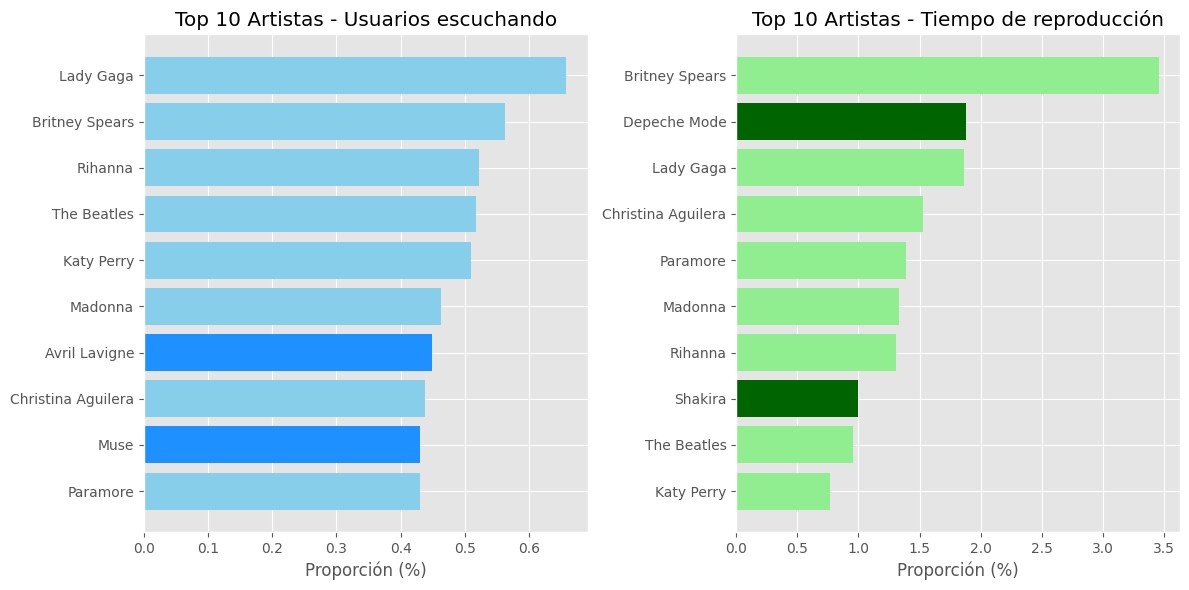

In [8]:
# Distribución de probabilidad sin ponderar
artist_count = dataset['artist_name'].value_counts(normalize=True).sort_values(ascending=False) * 100

# Distribución de probabilidad ponderada por el número de reproducciones
artist_weighted_counts = dataset.groupby('artist_name')['nro_reproducciones'].sum()
artist_weighted_distribution = artist_weighted_counts / artist_weighted_counts.sum() * 100

# Obtener los 10 artistas más populares en ambas distribuciones
top_10_unweighted = artist_count.head(10)
top_10_weighted = artist_weighted_distribution.sort_values(ascending=False).head(10)

only_in_unweighted = top_10_unweighted.index.difference(top_10_weighted.index)
only_in_weighted = top_10_weighted.index.difference(top_10_unweighted.index)

# Gráfica
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
colors = ['dodgerblue' if artist in only_in_unweighted else 'skyblue' for artist in top_10_unweighted.index]
plt.barh(top_10_unweighted.index, top_10_unweighted.values, color=colors)
plt.xlabel('Proporción (%)')
plt.title('Top 10 Artistas - Usuarios escuchando')
plt.gca().invert_yaxis()

plt.subplot(1, 2, 2)
colors = ['darkgreen' if artist in only_in_weighted else 'lightgreen' for artist in top_10_weighted.index]
plt.barh(top_10_weighted.index, top_10_weighted.values, color=colors)
plt.xlabel('Proporción (%)')
plt.title('Top 10 Artistas - Tiempo de reproducción')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

### Gráficas
- Artistas populares en número de reproducciones y en tiempo de reproducción: Lady Gaga y Britney Spears aparecen en ambas distribuciones, esto indica que no solo tienen una gran cantidad de oyentes, sino que también sus canciones son reproducidas con mucha frecuencia

- Artistas populares en número de reproducciones: Avril Lavigne y Muse, Aparecen en la lista sin ponderar pero no en la lista ponderada, lo que indica que, aunque muchos usuarios los escuchan, no se reproducen tan bien. Esto podría indicar que su música es popular entre una amplia audiencia, pero no necesariamente entre oyentes que la escuchan repetidamente.

- Artistas populares en tiempo de reproducción: Depeche Mode y Shakira no se encuentran entre los diez primeros de la distribución sin ponderar, pero sí entre los diez primeros de la distribución ponderada. Esto demuestra que, aunque no tienen muchos seguidores, aquellos que las escuchan suelen reproducir sus canciones repetidamente. Esto demuestra una base de seguidores más devota que consume más la música de estos artistas.

### Inferencias

Es posible medir la popularidad de un artista de varias maneras, cada una de las cuales ofrece una perspectiva diferente. Cuando observamos cuántos usuarios escuchan a ese artista, lo que nos da es una idea de cuán popular y atractivo general es el artista. Esta métrica es útil para encontrar artistas con una amplia base de seguidores, lo cual es útil en sistemas de recomendación que buscan sugerir música popular a un gran número de usuarios.

Por otro lado, nos concentramos en la intensidad del consumo al ponderar la popularidad por el número de reproducciones. Esto nos permite identificar artistas que, aunque no tengan un alcance tan amplio, son muy apreciados por un grupo más reducido de oyentes que los escuchan repetidamente. Esta métrica es crucial para atraer artistas con una base de seguidores fieles y dedicados; esto puede ser útil para recomendaciones más especializadas.

En este caso de recomendación, podría utilizarse un puntaje combinado que integre la popularidad general (proporción de usuarios que escuchan a un artista) y la intensidad del consumo (promedio de reproducciones por usuario) y que puede ser beneficioso para un sistema de recomendación de música. Este puntaje equilibrado capturaría tanto el alcance masivo como el atractivo único de los artistas, ofreciendo recomendaciones adaptadas tanto a oyentes casuales como a oyentes con gustos más claros y fieles.

#### 2.3 Para el usuario 8 (`userID==8`) ¿cuál es la distribución de reproducción de artistas basado en el número de reproducciones relativas?. Presente sus resultados usando tablas y/o gráficas. ¿Encuentra algún patrón en los artistas que escucha y las veces que reproduce? ¿Podemos decir algo de sus preferencias?


C:\Users\Esteb\AppData\Local\Temp\ipykernel_18548\2874401975.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_8_data['reproducciones_relativas'] = user_8_data['nro_reproducciones'] / user_8_data['nro_reproducciones'].sum() * 100


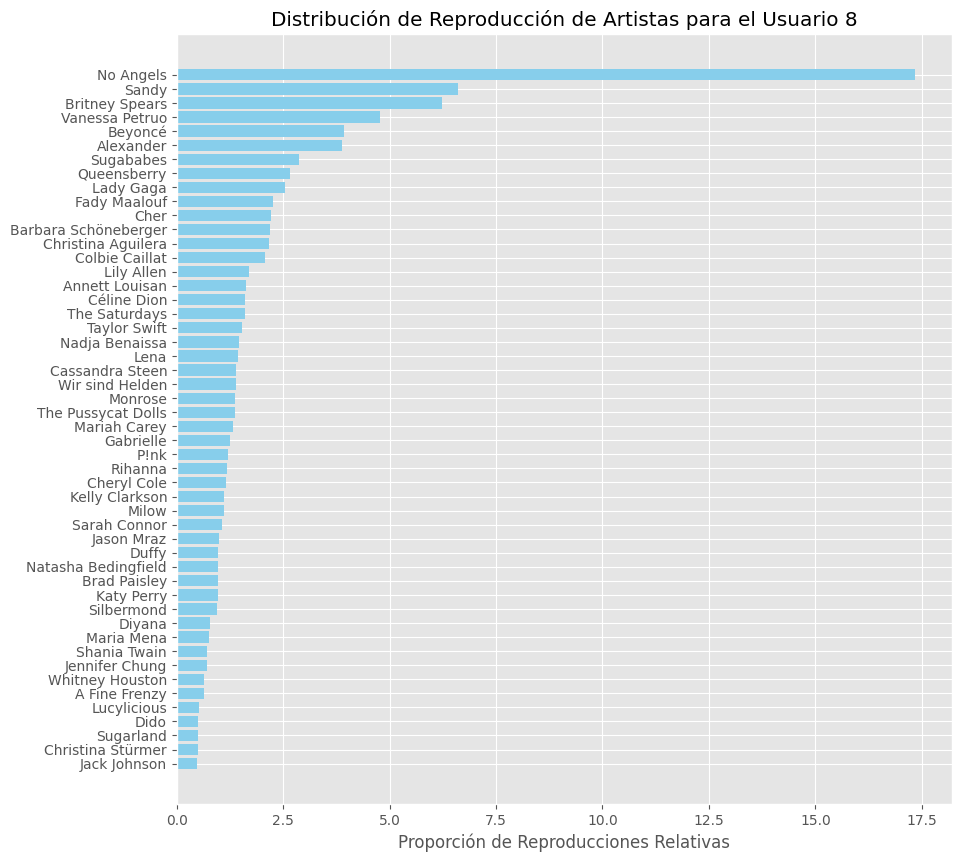

In [9]:
# Usuario con userID == 8
user_8_data = dataset[dataset['userID'] == 8]

# Calcular la distribución de reproducción de artistas basado en el número de reproducciones relativas
user_8_data['reproducciones_relativas'] = user_8_data['nro_reproducciones'] / user_8_data['nro_reproducciones'].sum() * 100
user_8_data = user_8_data.sort_values(by='reproducciones_relativas') 

# Gráfica
plt.figure(figsize=(10, 10))
plt.barh(user_8_data['artist_name'], user_8_data['reproducciones_relativas'], color='skyblue')
plt.xlabel('Proporción de Reproducciones Relativas')
plt.title('Distribución de Reproducción de Artistas para el Usuario 8')
plt.show()

El comportamiento del usuario 8 proporciona valiosas indicaciones para personalizar efectivamente las recomendaciones en un sistema de recomendaciones de música.

Con una alta concentración de reproducciones de unos pocos nombres, especialmente en géneros como pop y R&B, el usuario 8 muestra una clara lealtad hacia un pequeño grupo de artistas. Esto demuestra que el usuario aprecia la comodidad y probablemente busca experiencias musicales consistentes. Como es probable que el usuario 8 disfrute y acepte rápidamente este contenido, el sistema debería priorizar la recomendación de nuevos lanzamientos o canciones populares de estos mismos artistas.

A pesar de tener artistas favoritos, el usuario también muestra interés en explorar una variedad de otros artistas, aunque con menor intensidad. Esto indica que el usuario está dispuesto a conocer nueva música, pero prefiere que esta exploración se ajuste a sus gustos principales. El sistema podría gradualmente incluir recomendaciones de artistas similares o de subgéneros relacionados con el pop y el R&B. Por ejemplo, si una persona escucha mucho pop, podría también disfrutar del pop rock o del indie pop. Las recomendaciones podrían incluir artistas menos conocidos que comparten un estilo con sus favoritos, lo que anima a explorar sin salir demasiado de su zona de confort.

El usuario tiene una preferencia marcada por géneros específicos. Por lo tanto, el sistema de recomendaciones debe dividir las recomendaciones en función de estos géneros predominantes. Mientras tanto, podría ofrecer una mezcla controlada de otros géneros que están fuera de su alcance, como el folk rock o el soul.Los algoritmos de filtrado colaborativo o basado en contenido que tomen en cuenta las preferencias de género del usuario 8 y los patrones de escucha de usuarios similares deberían usarse en el sistema. Esto permitiría recomendar artistas o canciones que sean populares entre oyentes con gustos similares, lo que maximizará la relevancia de las recomendaciones.

El sistema de recomendaciones para el usuario 8 debe ser completamente personalizado y enfocado en ofrecer música de los géneros pop y R&B que los usuarios ya disfrutan, mientras se enfoca en agregar gradualmente nuevas opciones. Esta táctica no solo fortalece su lealtad a ciertos artistas, sino que también facilita una exploración controlada y relevante, manteniendo al usuario comprometido y satisfecho con las recomendaciones ofrecidas.

### 3. Generando Recomendaciones

En esta sección nos interesa generar recomendaciones ***nuevas y relevantes*** para el usuario 8 (`userID==8`). Para ello vamos a generar distintos sistemas de recomendación y comparar las recomendaciones generadas.

#### 3.1. Filtrado colaborativo sencillo: promedios simples.

Usando el promedio simple basado en el número de usuarios que escucha un artista (sin considerar el número de veces que estos usuarios reproducen al artista) genere una tabla y/o gráfica con 10 recomendaciones de artistas para este usuario. Explique con cuidado su procedimiento y justifique sus elecciones.

In [16]:
artist_count = dataset['artist_name'].value_counts(normalize=True).sort_values(ascending=False) * 100

,artistID,userID
17631,18745,1
7410,7568,1
7411,7569,1
7412,7570,1
7413,7571,1
...,...,...
294,300,473
221,227,480
282,288,484
283,289,522


In [12]:
# Artistas escuchados por 8
user_8_artists = user_8_data['artist_name'].unique()

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 3.2.  Filtrado colaborativo sencillo: promedios ponderados.

Usando el promedio ponderado basado en el número de usuarios que escucha un artista  y ponderando  por el número de veces que estos usuarios reproducen al artista (`nro_reproducciones`) genere una tabla y/o gráfica con 10 recomendaciones de artistas para este usuario. Explique con cuidado su procedimiento y justifique sus elecciones. Compare las recomendaciones con el sistema implementado en el paso anterior.


In [93]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 3.3.  Filtrado colaborativo sencillo: similitud de coseno.

Usando el promedio ponderado de reproducciones genere una tabla y/o gráfica  con 10 recomendaciones de artistas para este usuario. Para generar los pesos utilice la distancia de coseno. Explique con cuidado su procedimiento y justifique sus elecciones. Compare las recomendaciones con el sistema implementado en el paso anterior.

In [94]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 3.4.  Filtrado colaborativo usando SVD


Usando la descomposición en valores singulares (SVD) genere una tabla y/o gráfica  con 10 recomendaciones de artistas para este usuario.  Explique con cuidado su procedimiento y justifique sus elecciones. Compare las recomendaciones con el sistema implementado en los pasos anteriores.


In [95]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 3.5.  Filtrado colaborativo usando Análisis de Canasta de Compra

Usando  el algoritmo `Apriori` genere una tabla y/o gráfica  con 10 recomendaciones de artistas para este usuario.  Explique con cuidado su procedimiento y justifique sus elecciones. Compare las recomendaciones con el sistema implementado en los pasos anteriores. Esto puede tomar mucho tiempo, sea cuidadoso al elegir los hiper-parámetors del modelo, utilice los resultados de las estadísticas descriptivas para elegir sus hiper-parámetros, y genere solo reglas con 2 elementos. (Puede también aprovechar los recursos de [Google Colab](https://colab.research.google.com/))


In [96]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

### 4. Recomendaciones generales 

De acuerdo con los resultados encontrados, en su opinión ¿qué procedimiento generó las mejores recomendaciones para este usuario? ¿Cómo implementaría una evaluación objetiva de estas recomendaciones? Justifique su respuesta.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).